In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# gsw oceanic toolbox: http://www.teos-10.org/pubs/Getting_Started.pdf
import gsw
from scipy.io import loadmat
import os
import sys
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
sys.path.append('../..')
from src.data.functions import safe_log, convert_datetime
from src.utils.directories import get_parent_directory

import sys
import os
sys.path.append('../..')
from src.features.processing_func import mld
from src.features.calc_seaice import calc_SIC
from src.utils.directories import get_parent_directory

In [3]:
# Load data
parent_dir = get_parent_directory()
b2007_nc = os.path.join(parent_dir, "data/external/microstructure/IPY_Barneo2007_MSS.nc")
b2008_nc = os.path.join(parent_dir, "data/external/microstructure/IPY_Barneo2008_MSS.nc")
b2007_ds = xr.open_dataset(b2007_nc)
b2008_ds = xr.open_dataset(b2008_nc)

In [12]:
formatted_2008 = b2008_ds.assign(time=b2008_ds.coords['TIME'])
formatted_2008 = formatted_2008.drop(["TIME"])
formatted_2008 = formatted_2008.rename({"TIME": "profile", "DEPTH": "depth"})
formatted_2008 = formatted_2008.rename_vars({"EPSI": "eps", "LATITUDE": "latitude", "LONGITUDE": "longitude", "TEMP": "T", "PRES": "P", "PSAL": "S"})

In [14]:
formatted_2007 = b2007_ds.assign(time=b2007_ds.coords['TIME'])
formatted_2007 = formatted_2007.drop(["TIME"])
formatted_2007 = formatted_2007.rename({"TIME": "profile", "DEPTH": "depth"})
formatted_2007 = formatted_2007.rename_vars({"EPSI": "eps", "LATITUDE": "latitude", "LONGITUDE": "longitude", "TEMP": "T", "PRES": "P", "PSAL": "S"})

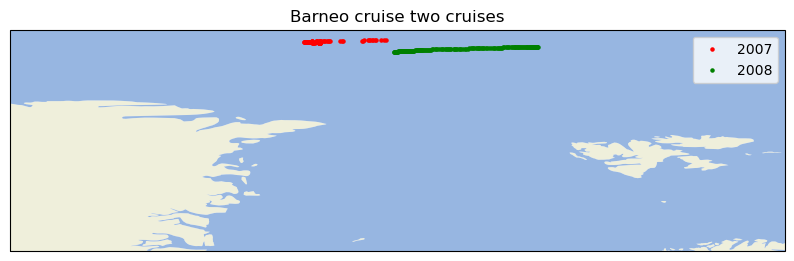

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.scatter(formatted_2007.longitude, formatted_2007.latitude, transform=ccrs.PlateCarree(), color='red', s=5, label = "2007")
ax.scatter(formatted_2008.longitude, formatted_2008.latitude, transform=ccrs.PlateCarree(), color='green', s=5, label = "2008")

# Add land, ocean, and borders
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))

ax.set_extent([-40,30, 70, 90], crs=ccrs.PlateCarree())
ax.set_title("Barneo cruise two cruises")
# Add a legend
plt.legend()
plt.show()

## Check if MLD and calc_SIC work

In [20]:
SI_HadISST = os.path.join(parent_dir, "data/external/SI-area/HadISST_ice.nc")
Hadi_SI = xr.open_dataset(SI_HadISST)

In [24]:
barneo2007_SIC = calc_SIC(formatted_2007, Hadi_SI)
barneo2008_SIC = calc_SIC(formatted_2008, Hadi_SI)

In [28]:
formatted_2007 = formatted_2007.transpose("depth", "profile")
barneo2007_MLD = mld(formatted_2007)

formatted_2008 = formatted_2008.transpose("depth", "profile")
barneo2008_MLD = mld(formatted_2008)

## Save dataframe

In [29]:
# Construct the file path using the parent directory
file_path2007 = os.path.join(parent_dir, "data", "interim", "barneo2007_ds.nc")
file_path2008 = os.path.join(parent_dir, "data", "interim", "barneo2008_ds.nc")

formatted_2007.to_netcdf(file_path2007)
formatted_2008.to_netcdf(file_path2008)